In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load mnist data

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# sort and get index of each class
a = []
for i in range(0, 10):
    b = []
    for j in range(0, 60000):
        if y_train[j] == i:
            b.append(j) # each b contains indices of i class
    a.append(b) 

In [4]:
import random

rand = []
for i in range(0, 10):
    rand.append(random.choices(a[i], k=10)) # choose randomly 10 sample per class
rand = np.array(rand).flatten().tolist() 

In [5]:
x_train_lab = x_train[rand] # apply mask to get 100 random samples 
y_train_lab = y_train[rand] # 10 samples per class

In [6]:
not_rand = [] # list of indices that dont exist in labeled data
for i in range(0, 60_000):
    if i not in rand:
        not_rand.append(i)

not_rand = np.array(not_rand)

x_train_unlab = x_train[not_rand] # apply the mask to get the unlabled data
y_train_unlab = y_train[not_rand]

# reshping data to tensors since we're using CNN
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32')
y_train = to_categorical(y_train)

x_train_lab = x_train_lab.reshape((100, 28, 28, 1))
y_train_lab = to_categorical(y_train_lab)

x_train_unlab = x_train_unlab.reshape((59900, 28, 28, 1))

x_test = x_test.reshape((10000, 28, 28, 1))
y_test = to_categorical(y_test)


print("x_train: ", len(x_train_lab))
print("y_train: ", len(y_train_lab))
print("x_test: ", len(x_test))
print("y_test: ", len(y_test))

x_train:  100
y_train:  100
x_test:  10000
y_test:  10000


In [7]:
model_cnn = Sequential()
# convolution layer with 3x3 filter
model_cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)))
# maxpooling layer
model_cnn.add(MaxPooling2D((2,2)))
# convolution layer with 3x3 filter
model_cnn.add(Conv2D(64, (3,3), activation="relu"))
# maxpooling layer
model_cnn.add(MaxPooling2D((2,2)))
# convolution layer with 3x3 filter
model_cnn.add(Conv2D(64, (3,3), activation="relu"))
# flatten the layers
model_cnn.add(Flatten())
# dense layer with 256 units and relu activation
model_cnn.add(Dense(256, activation= 'relu'))
# dropout layer to keep 60% of units
model_cnn.add(Dropout(0.4))
# dense layer with 500 units and relu activation
model_cnn.add(Dense(500, activation= 'relu'))
# dropout layer to keep 40% of units
model_cnn.add(Dropout(0.6))
# dense layer with 64 units and relu activation
model_cnn.add(Dense(64, activation= 'relu'))
# dropout layer to keep 80% of units
model_cnn.add(Dropout(0.2))
# Output layer with 10 units and softmax activation
model_cnn.add(Dense(10, activation= 'softmax'))
# get summary of the model
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [8]:
# compile model with adam optimizer and categorical loss
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# train the model on  training set
#100 train set
history = model_cnn.fit(x_train_lab, y_train_lab, epochs=100, batch_size=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 203ms/step - loss: 12.1106 - accuracy: 0.0600 - val_loss: 2.4464 - val_accuracy: 0.1281
Epoch 2/100
10/10 [==============================] - 2s 178ms/step - loss: 3.4282 - accuracy: 0.1200 - val_loss: 2.2380 - val_accuracy: 0.1780
Epoch 3/100
10/10 [==============================] - 2s 178ms/step - loss: 2.2466 - accuracy: 0.1700 - val_loss: 2.1954 - val_accuracy: 0.2469
Epoch 4/100
10/10 [==============================] - 2s 179ms/step - loss: 2.1738 - accuracy: 0.2100 - val_loss: 2.1256 - val_accuracy: 0.3349
Epoch 5/100
10/10 [==============================] - 2s 180ms/step - loss: 2.1219 - accuracy: 0.2300 - val_loss: 2.0234 - val_accuracy: 0.3995
Epoch 6/100
10/10 [==============================] - 2s 180ms/step - loss: 2.1288 - accuracy: 0.2100 - val_loss: 1.8921 - val_accuracy: 0.4276
Epoch 7/100
10/10 [==============================] - 2s 179ms/step - loss: 1.8228 - accuracy: 0.3800 - val_loss: 1.7367 - val_accuracy: 0.458

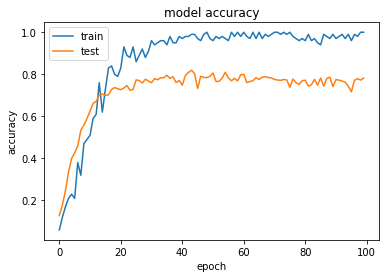

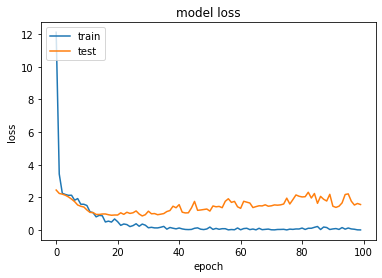

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#60000 train set
history = model_cnn.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
6000/6000 [==============================] - 21s 4ms/step - loss: 0.2493 - accuracy: 0.9389 - val_loss: 0.1485 - val_accuracy: 0.9701
Epoch 2/100
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1606 - accuracy: 0.9635 - val_loss: 0.1022 - val_accuracy: 0.9756
Epoch 3/100
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1405 - accuracy: 0.9691 - val_loss: 0.0695 - val_accuracy: 0.9835
Epoch 4/100
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1367 - accuracy: 0.9715 - val_loss: 0.0991 - val_accuracy: 0.9816
Epoch 5/100
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1352 - accuracy: 0.9722 - val_loss: 0.0753 - val_accuracy: 0.9828
Epoch 6/100
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1392 - accuracy: 0.9722 - val_loss: 0.1244 - val_accuracy: 0.9782
Epoch 7/100
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1266 - accuracy: 0.9749 - val_loss: 0.1063 -

KeyboardInterrupt: ignored

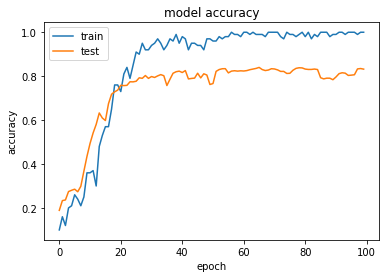

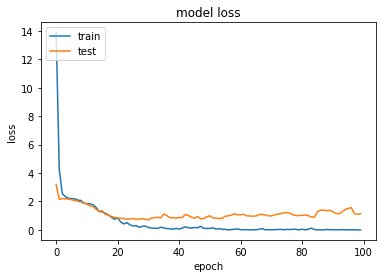

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()